<a href="https://colab.research.google.com/github/EyyupArslan/decisiontree/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

# read data
df = pd.read_csv('data_banknote_authentication.txt', header=None)


Saving data_banknote_authentication.txt to data_banknote_authentication (2).txt


In [ ]:
# Assigning column names
df.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

# Display the first few lines
print("Veri seti örneği:")
print(df.head())

Veri seti örneği:
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


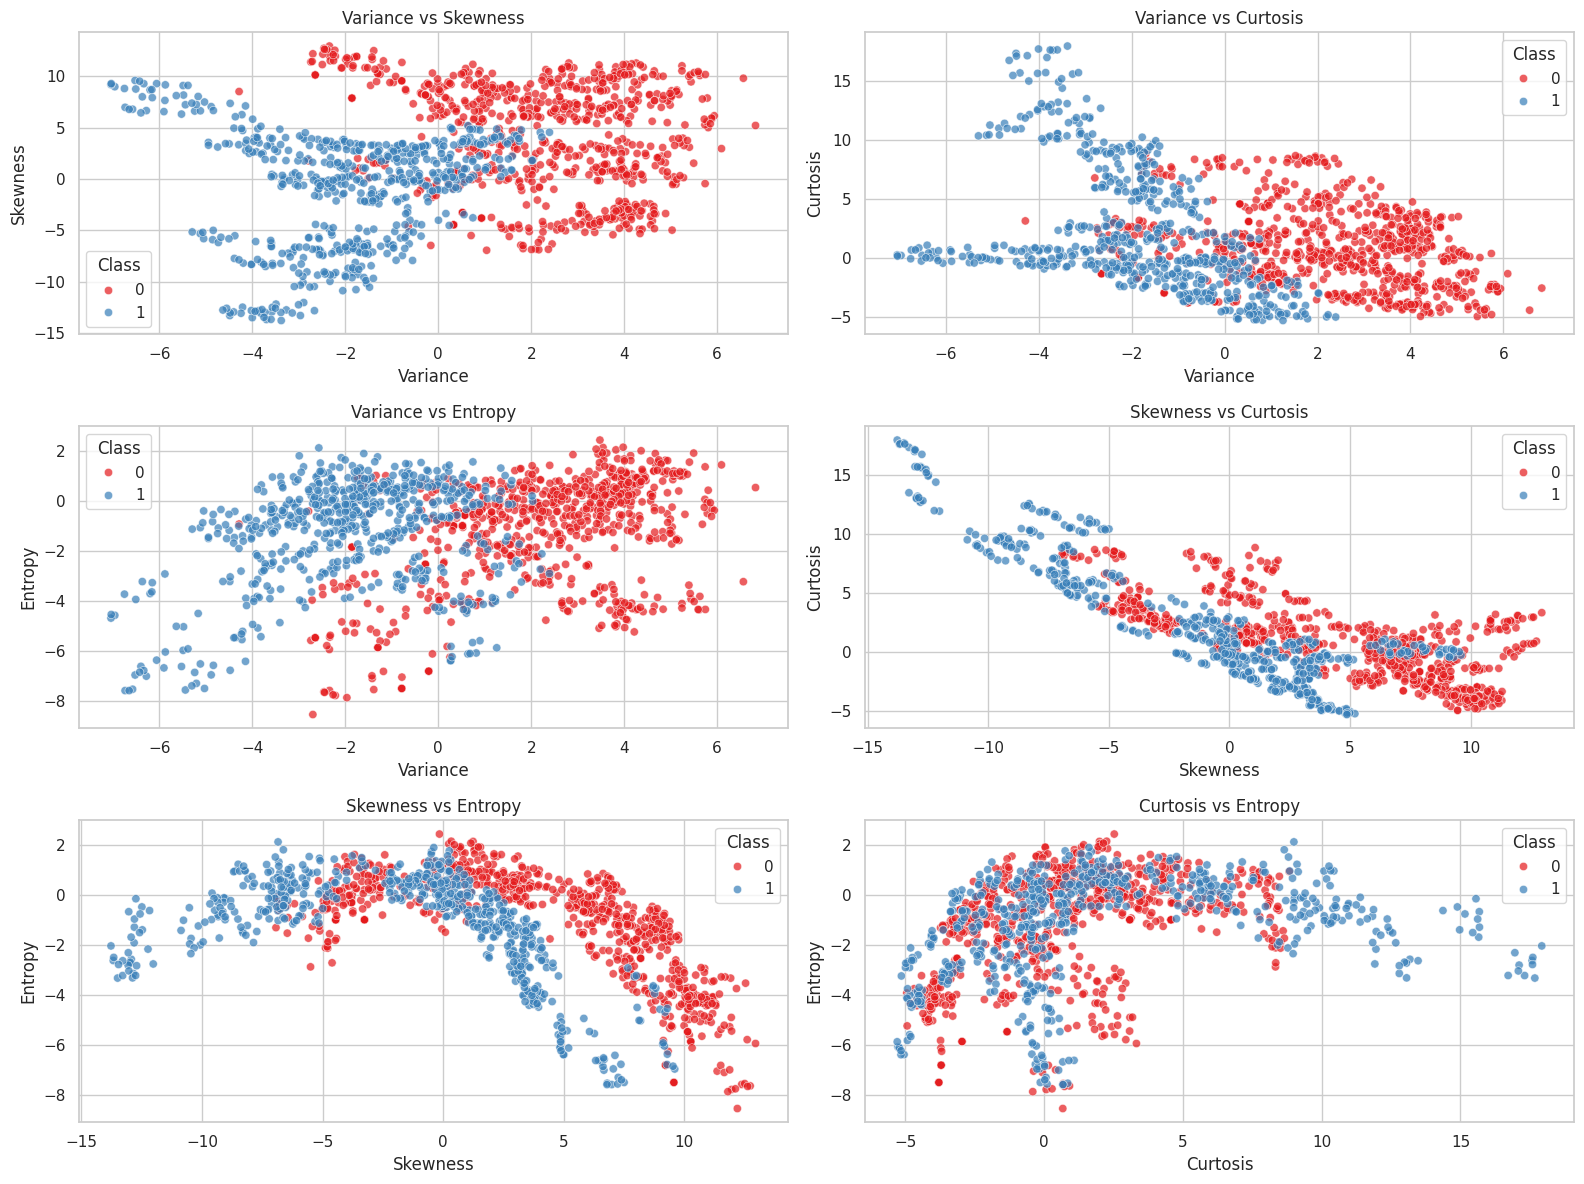

In [ ]:
# Visualizing feature pairs
features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']

# Visualizing features in pairs
sns.set(style='whitegrid')
plt.figure(figsize=(16, 12))

plot_num = 1
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.subplot(3, 2, plot_num)
        sns.scatterplot(data=df, x=features[i], y=features[j], hue='Class', palette='Set1', alpha=0.7)
        plt.title(f'{features[i]} vs {features[j]}')
        plot_num += 1

plt.tight_layout()
plt.show()

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       148
           1       1.00      0.94      0.97       127

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275

✅ Accuracy: 0.9709090909090909


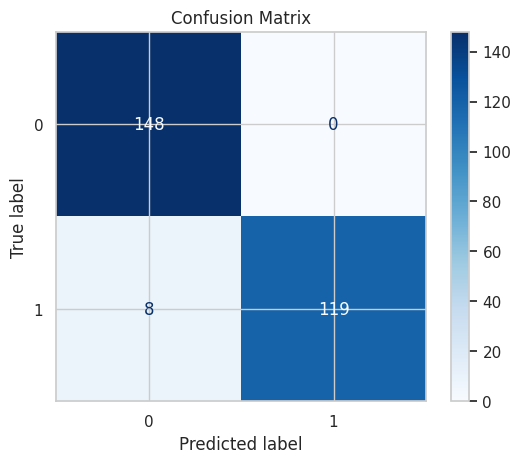

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Separate properties and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Divide it into 80% training and 20% testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model Training with Different Parameters ---
# Example parameters
params = {
    'max_depth': 4,
    'min_samples_split': 5,
    'criterion': 'entropy'  # You can try "gini" or "entropy"
}

# Build and train the model
model = DecisionTreeClassifier(**params, random_state=42)
model.fit(X_train, y_train)

# Make a guess
y_pred = model.predict(X_test)

# --- Performance Metrics ---
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Params → criterion: gini, max_depth: 2, min_samples_split: 2
Accuracy : 0.8800
Precision: 0.9052
Recall   : 0.8268
F1-score : 0.8642


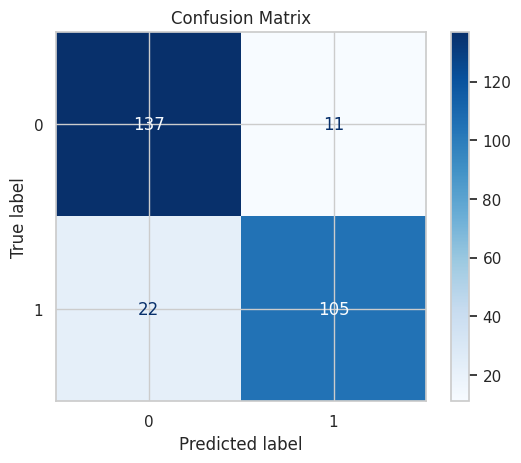

Params → criterion: gini, max_depth: 2, min_samples_split: 5
Accuracy : 0.8800
Precision: 0.9052
Recall   : 0.8268
F1-score : 0.8642


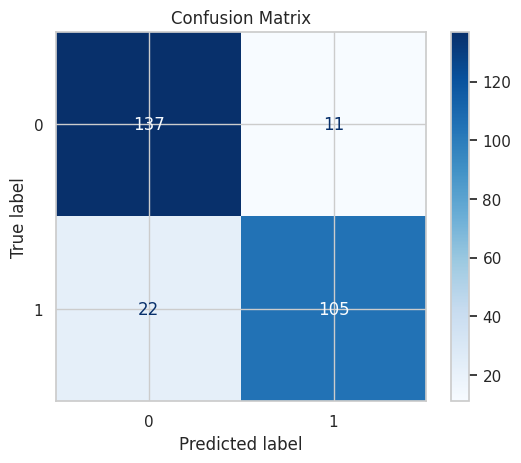

Params → criterion: gini, max_depth: 2, min_samples_split: 10
Accuracy : 0.8800
Precision: 0.9052
Recall   : 0.8268
F1-score : 0.8642


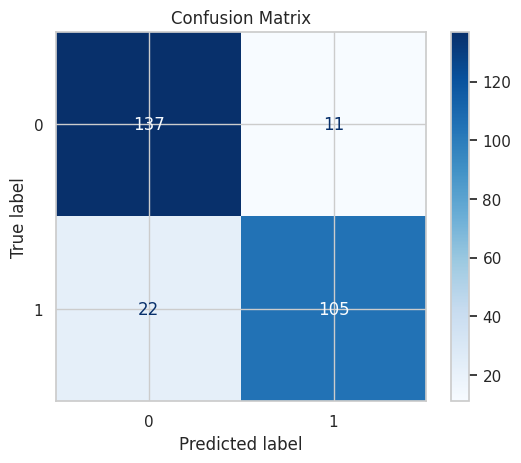

Params → criterion: gini, max_depth: 3, min_samples_split: 2
Accuracy : 0.9091
Precision: 0.9250
Recall   : 0.8740
F1-score : 0.8988


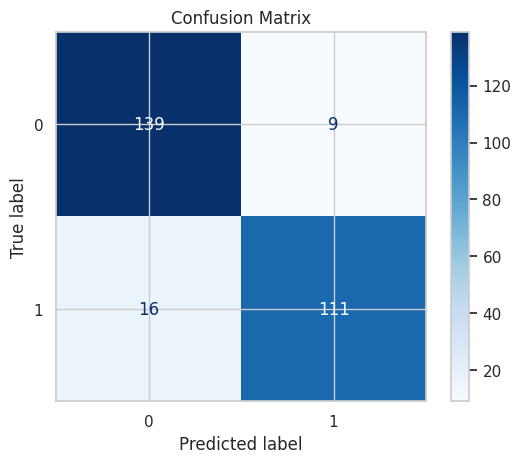

Params → criterion: gini, max_depth: 3, min_samples_split: 5
Accuracy : 0.9091
Precision: 0.9250
Recall   : 0.8740
F1-score : 0.8988


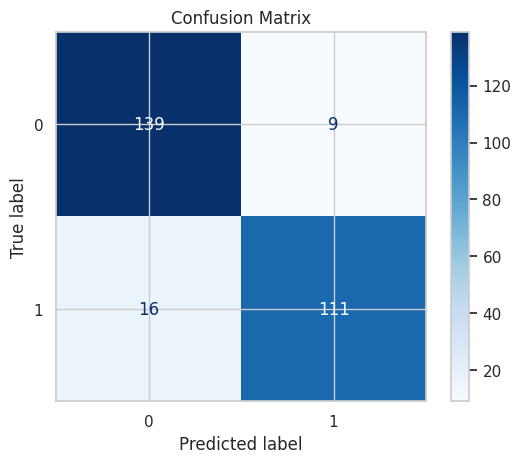

Params → criterion: gini, max_depth: 3, min_samples_split: 10
Accuracy : 0.9091
Precision: 0.9250
Recall   : 0.8740
F1-score : 0.8988


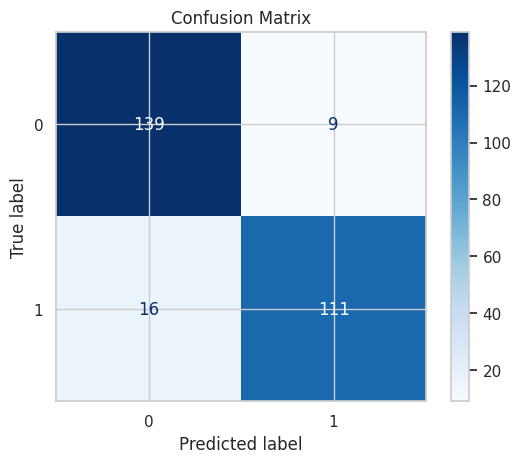

Params → criterion: gini, max_depth: 4, min_samples_split: 2
Accuracy : 0.9345
Precision: 0.9360
Recall   : 0.9213
F1-score : 0.9286


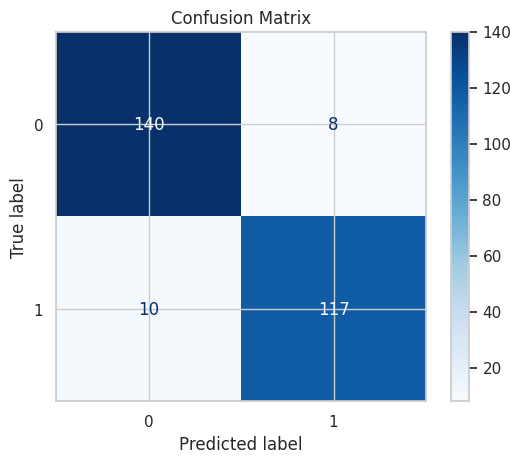

Params → criterion: gini, max_depth: 4, min_samples_split: 5
Accuracy : 0.9345
Precision: 0.9360
Recall   : 0.9213
F1-score : 0.9286


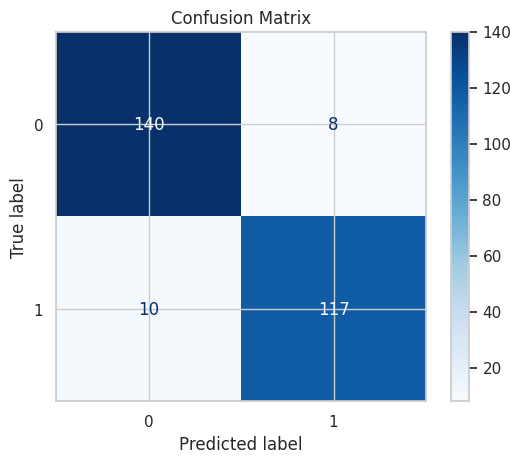

Params → criterion: gini, max_depth: 4, min_samples_split: 10
Accuracy : 0.9345
Precision: 0.9360
Recall   : 0.9213
F1-score : 0.9286


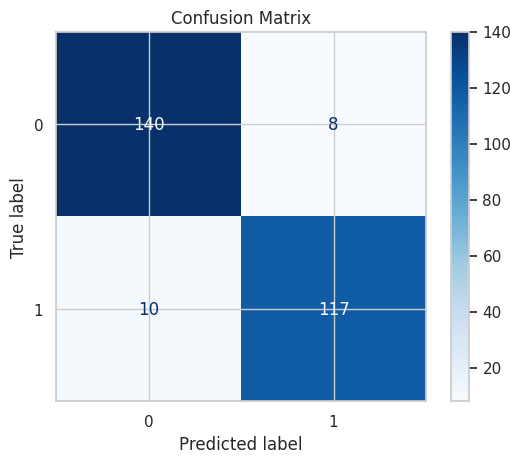

Params → criterion: gini, max_depth: 5, min_samples_split: 2
Accuracy : 0.9673
Precision: 1.0000
Recall   : 0.9291
F1-score : 0.9633


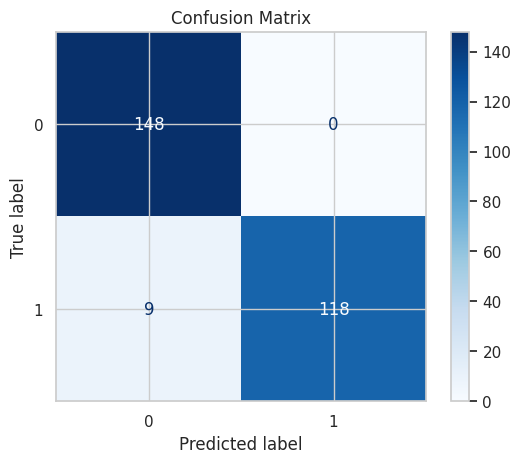

Params → criterion: gini, max_depth: 5, min_samples_split: 5
Accuracy : 0.9673
Precision: 1.0000
Recall   : 0.9291
F1-score : 0.9633


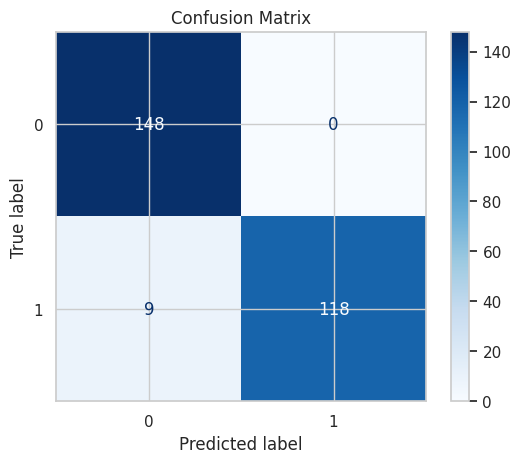

Params → criterion: gini, max_depth: 5, min_samples_split: 10
Accuracy : 0.9673
Precision: 1.0000
Recall   : 0.9291
F1-score : 0.9633


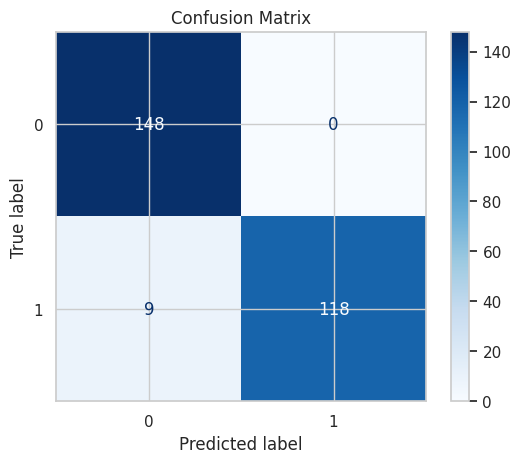

Params → criterion: gini, max_depth: None, min_samples_split: 2
Accuracy : 0.9818
Precision: 1.0000
Recall   : 0.9606
F1-score : 0.9799


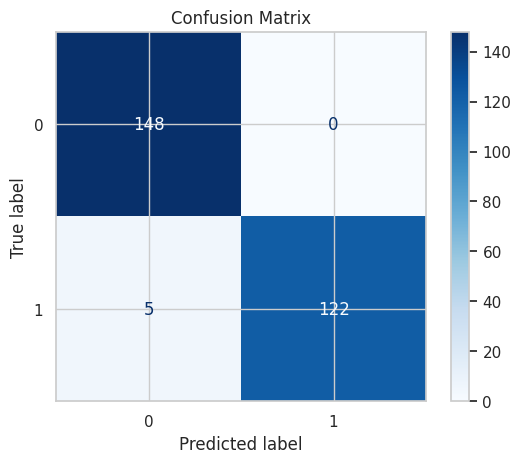

Params → criterion: gini, max_depth: None, min_samples_split: 5
Accuracy : 0.9782
Precision: 0.9919
Recall   : 0.9606
F1-score : 0.9760


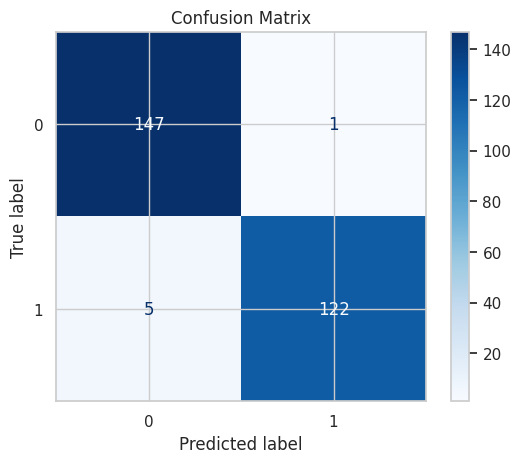

Params → criterion: gini, max_depth: None, min_samples_split: 10
Accuracy : 0.9818
Precision: 1.0000
Recall   : 0.9606
F1-score : 0.9799


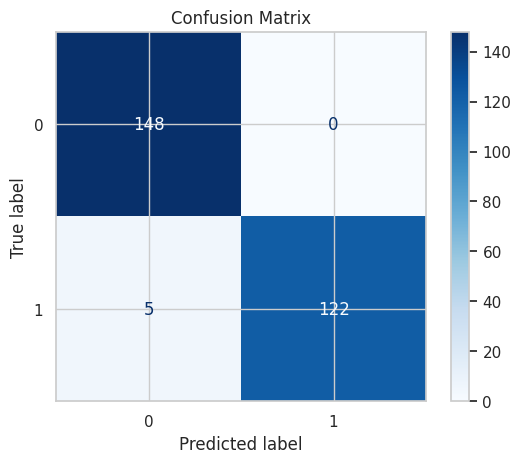

Params → criterion: entropy, max_depth: 2, min_samples_split: 2
Accuracy : 0.8509
Precision: 0.9479
Recall   : 0.7165
F1-score : 0.8161


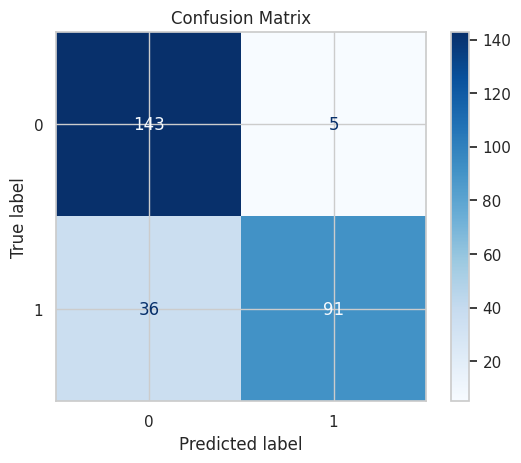

Params → criterion: entropy, max_depth: 2, min_samples_split: 5
Accuracy : 0.8509
Precision: 0.9479
Recall   : 0.7165
F1-score : 0.8161


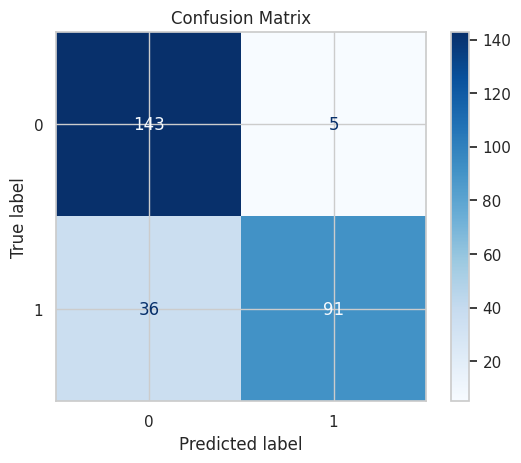

Params → criterion: entropy, max_depth: 2, min_samples_split: 10
Accuracy : 0.8509
Precision: 0.9479
Recall   : 0.7165
F1-score : 0.8161


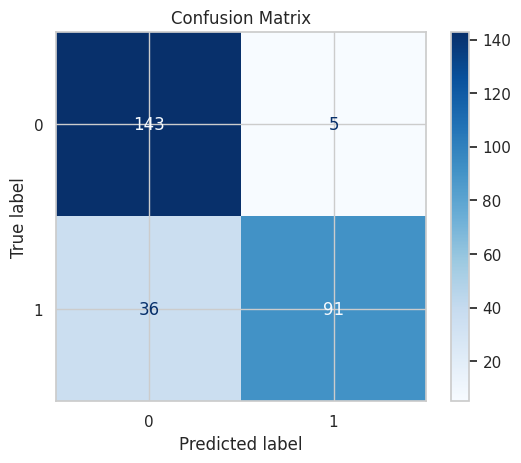

Params → criterion: entropy, max_depth: 3, min_samples_split: 2
Accuracy : 0.9491
Precision: 0.9520
Recall   : 0.9370
F1-score : 0.9444


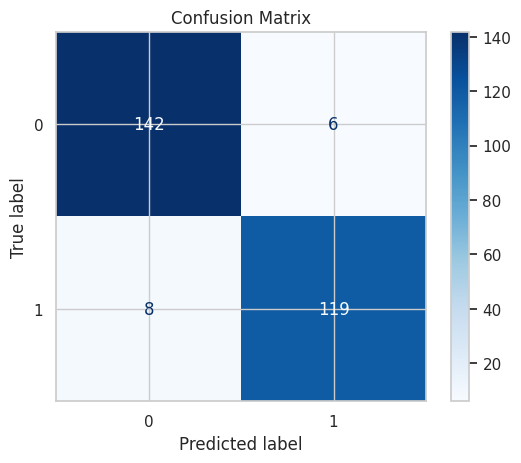

Params → criterion: entropy, max_depth: 3, min_samples_split: 5
Accuracy : 0.9491
Precision: 0.9520
Recall   : 0.9370
F1-score : 0.9444


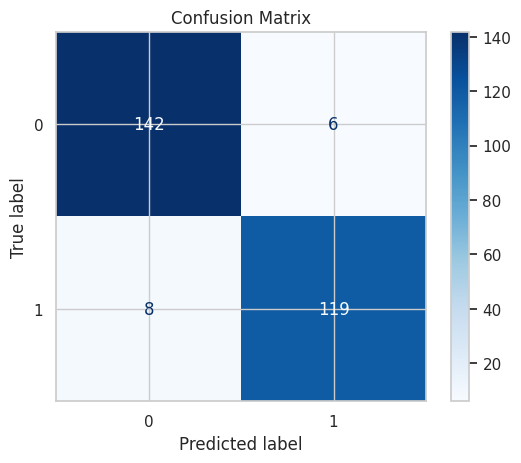

Params → criterion: entropy, max_depth: 3, min_samples_split: 10
Accuracy : 0.9491
Precision: 0.9520
Recall   : 0.9370
F1-score : 0.9444


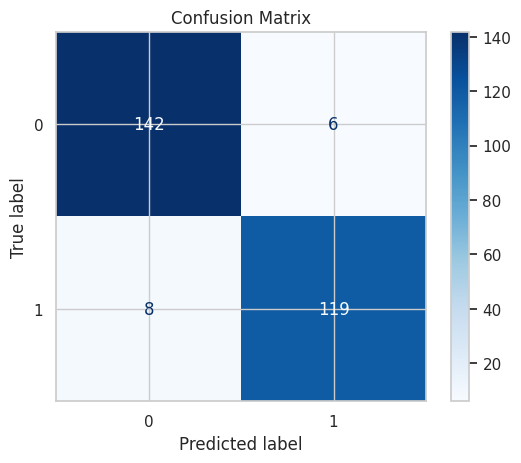

Params → criterion: entropy, max_depth: 4, min_samples_split: 2
Accuracy : 0.9709
Precision: 1.0000
Recall   : 0.9370
F1-score : 0.9675


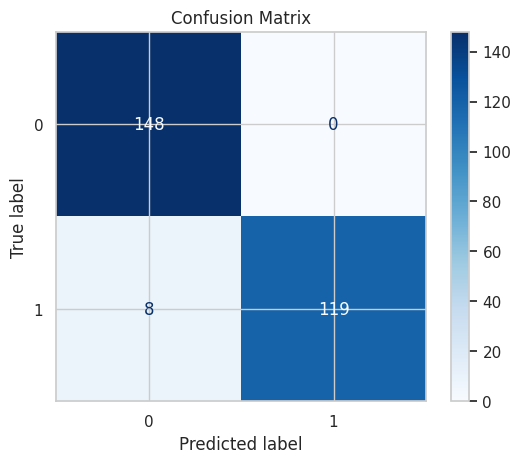

Params → criterion: entropy, max_depth: 4, min_samples_split: 5
Accuracy : 0.9709
Precision: 1.0000
Recall   : 0.9370
F1-score : 0.9675


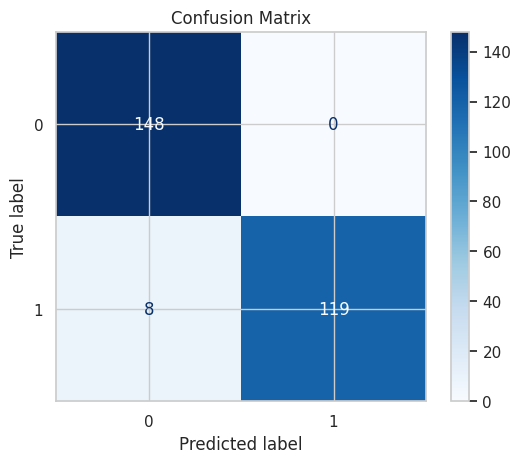

Params → criterion: entropy, max_depth: 4, min_samples_split: 10
Accuracy : 0.9709
Precision: 1.0000
Recall   : 0.9370
F1-score : 0.9675


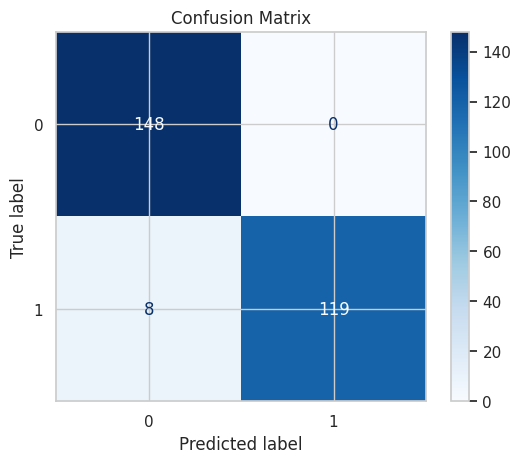

Params → criterion: entropy, max_depth: 5, min_samples_split: 2
Accuracy : 0.9782
Precision: 0.9919
Recall   : 0.9606
F1-score : 0.9760


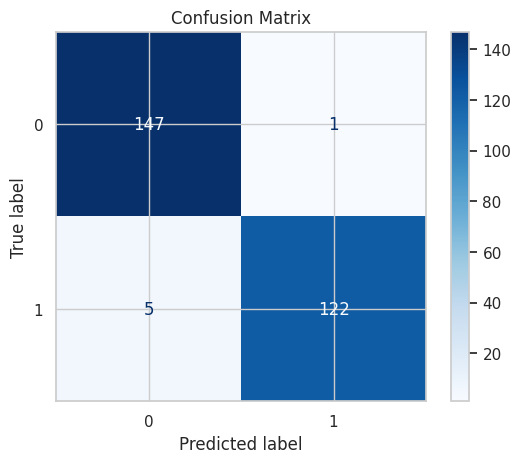

Params → criterion: entropy, max_depth: 5, min_samples_split: 5
Accuracy : 0.9782
Precision: 0.9919
Recall   : 0.9606
F1-score : 0.9760


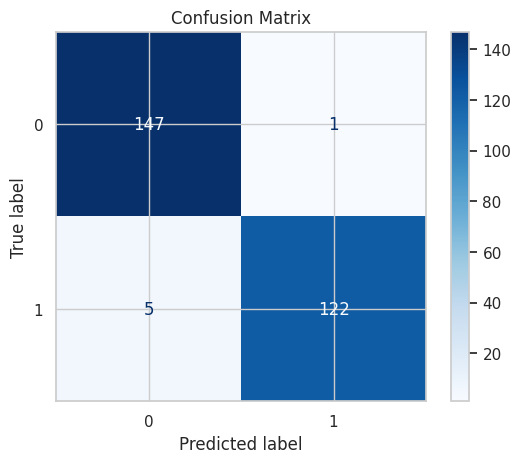

Params → criterion: entropy, max_depth: 5, min_samples_split: 10
Accuracy : 0.9782
Precision: 0.9919
Recall   : 0.9606
F1-score : 0.9760


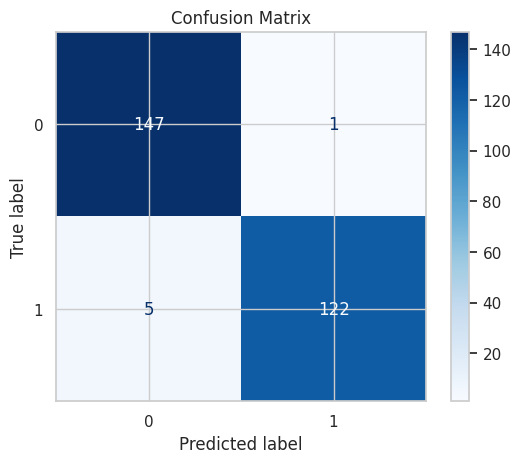

Params → criterion: entropy, max_depth: None, min_samples_split: 2
Accuracy : 0.9855
Precision: 1.0000
Recall   : 0.9685
F1-score : 0.9840


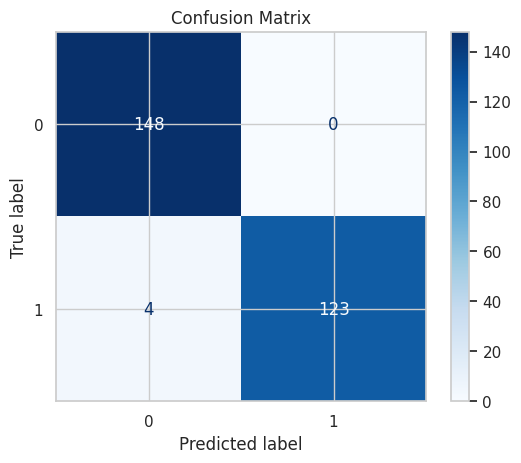

Params → criterion: entropy, max_depth: None, min_samples_split: 5
Accuracy : 0.9855
Precision: 1.0000
Recall   : 0.9685
F1-score : 0.9840


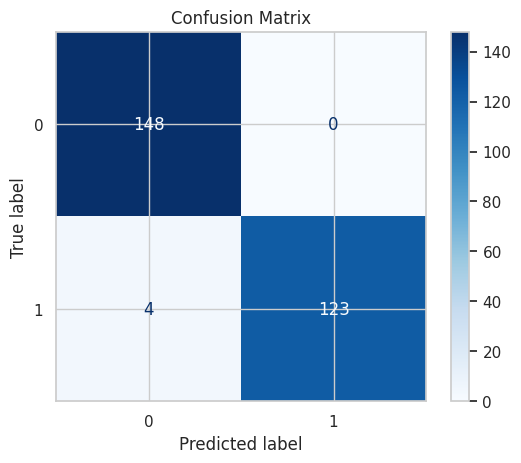

Params → criterion: entropy, max_depth: None, min_samples_split: 10
Accuracy : 0.9818
Precision: 0.9919
Recall   : 0.9685
F1-score : 0.9801


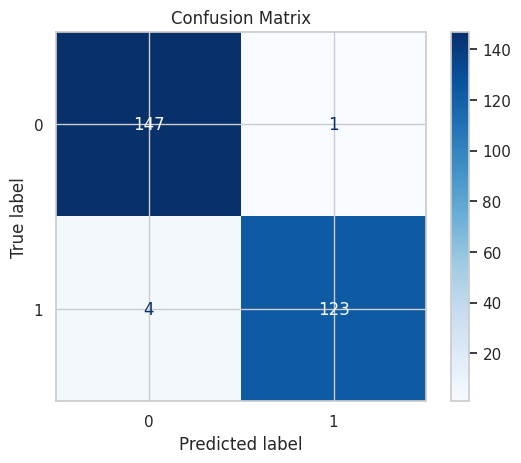

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Parameter options
depths = [2, 3, 4, 5, None]
splits = [2, 5, 10]
criterions = ['gini', 'entropy']

# If training and test set is already defined as X_train, X_test, y_train, y_test, no need to repeat

# Try all combinations
for criterion in criterions:
    for max_depth in depths:
        for min_split in splits:
            print("="*60)
            print(f"Params → criterion: {criterion}, max_depth: {max_depth}, min_samples_split: {min_split}")

            # Build and train the model
            model = DecisionTreeClassifier(
                criterion=criterion,
                max_depth=max_depth,
                min_samples_split=min_split,
                random_state=42
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Metrics
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            print(f"Accuracy : {acc:.4f}")
            print(f"Precision: {prec:.4f}")
            print(f"Recall   : {rec:.4f}")
            print(f"F1-score : {f1:.4f}")

            # Confusion Matrix
            disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
            disp.ax_.set_title("Confusion Matrix")
            plt.show()


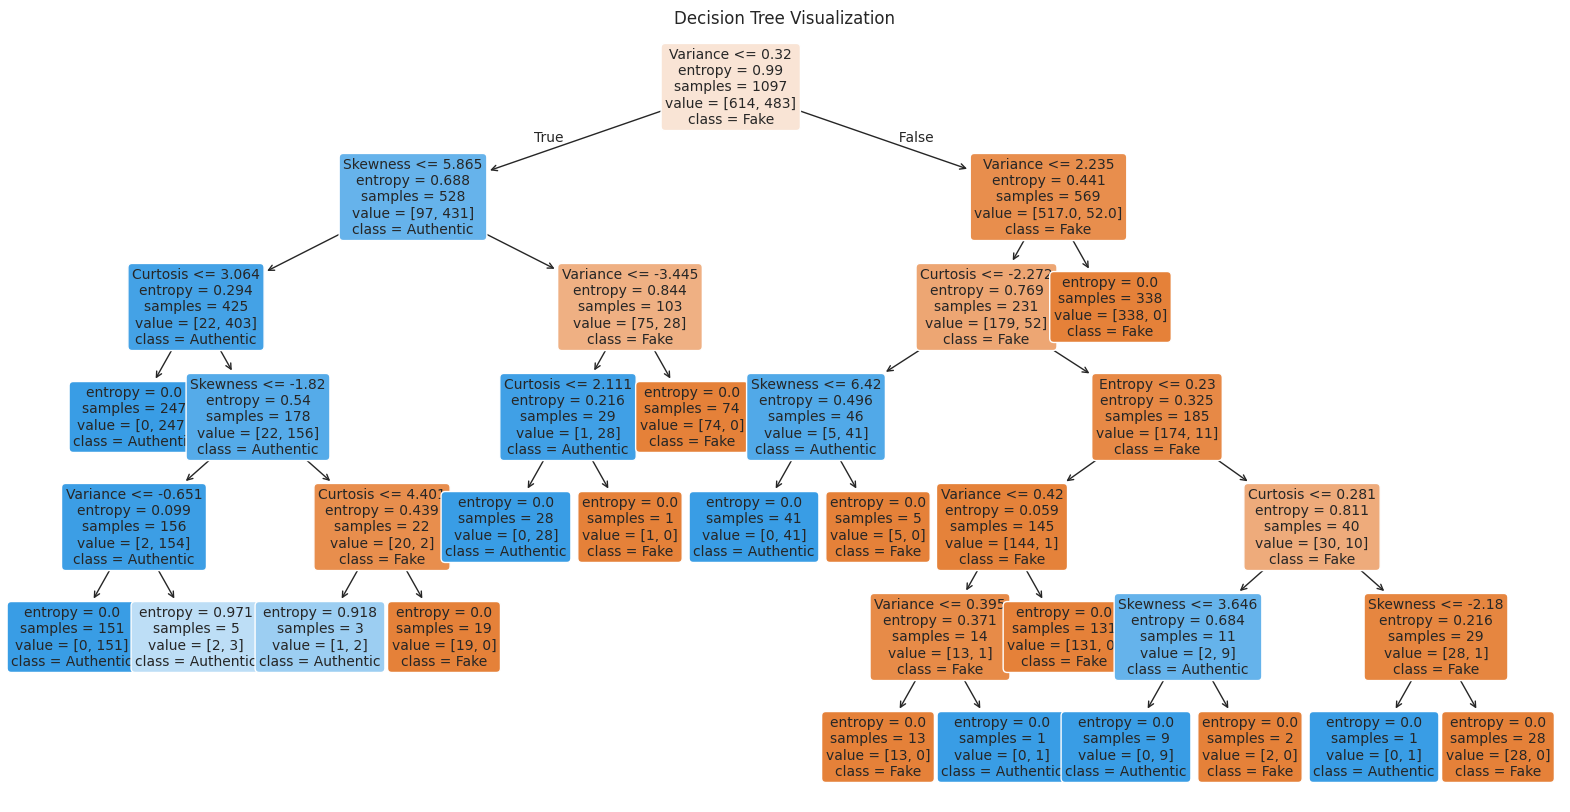

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizing the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    filled=True,
    feature_names=X.columns,
    class_names=['Fake', 'Authentic'],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


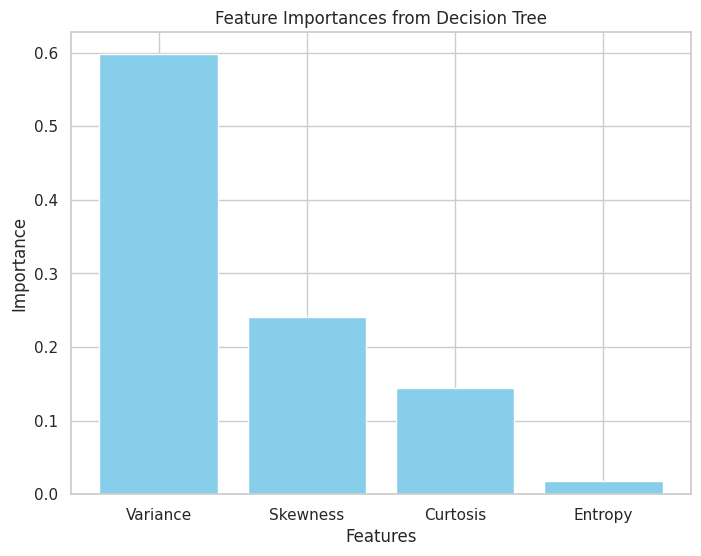

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Get the feature_importances_ values ​​of the model
importances = model.feature_importances_
feature_names = X.columns

# Import feature importance into DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualize with bar chart
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.show()
